# Optional HW

For this initial homework we will be working with a [dataset](https://github.com/fivethirtyeight/guns-data/blob/master/interactive_data.csv) available as a part of an interesting analysis of [gunshot deaths in the US](http://fivethirtyeight.com/features/gun-deaths/). The goal of this optional homework is to carefully go through the interactive visualization portrayed at the top of the aforementioned article, and use an IPython Notebook to reproduce the following claims made in the visualization:
- Nearly *two-thirds* of gun deaths are *suicides*.
- More than *85 percent* of suicide victims are *male*.
- Around *a third* of all gun deaths are *homicides*.
- Around *two-thirds* of homicide victims who are *males* in the *age-group of 15--34* are *black*.
- *Women* constitue only *15 percent* of the total *homicide* victims.

It's not necessary to generate visualizations for the results -- numbers should be more than enough to convince yourself that you 
were able to reproduce the results of that article.

You can use this opportunity first of all to refresh your Python skills. If you are coming from another programming language
(especially a static PL like Java and C++), we recommend you to take a look at this presentation:
[Code Like a Pythonista: Idiomatic Python](http://www.omahapython.org/IdiomaticPython.html) -- it will teach
you how to write nice Python code, while at the same time getting you up to speed with the syntax.
Feel free to explore more advanced libraries (like [Pandas](http://pandas.pydata.org/)) if you really want, but keep in mind that you
should be able to reproduce the results with the Python Standard Library.
One advantage of using only the PSL is that once you will get knowledgeable about Pandas you will appreciate how much more concise
and readable your code will become :)

Credits to [Michele Catasta](https://github.com/pirroh), on whose material this version is based.


In [24]:
with open('Data/data.csv') as file:
    content = file.readlines()

print(content[0])
header = content[0].replace('"', '').replace(' ', '').strip().split(',')
rows = []
for row in content[1:]:    
    rows.append(row.replace('"', ' ').replace(' ', '').strip().split(','))

print(header)
print(rows[:10])

"","Intent","Gender","Age","Race","Deaths","Population","Rate"

['', 'Intent', 'Gender', 'Age', 'Race', 'Deaths', 'Population', 'Rate']
[['1', 'Noneselected', 'Noneselected', 'Noneselected', 'Noneselected', '33599', '316299978', '10.6'], ['2', 'Noneselected', 'Noneselected', 'Noneselected', 'White', '22079', '197369634', '11.2'], ['3', 'Noneselected', 'Noneselected', 'Noneselected', 'Black', '7765', '38896382', '20'], ['4', 'Noneselected', 'Noneselected', 'Noneselected', 'Hispanic', '3007', '54049078', '5.6'], ['5', 'Noneselected', 'Noneselected', 'Noneselected', 'Asian/PacificIslander', '442', '16315561', '2.7'], ['6', 'Noneselected', 'Noneselected', 'Noneselected', 'Other', '306', '9669323', '3.2'], ['7', 'Noneselected', 'Noneselected', 'Under15', 'Noneselected', '427', '61085868', '0.7'], ['8', 'Noneselected', 'Noneselected', 'Under15', 'White', '242', '31538832', '0.8'], ['9', 'Noneselected', 'Noneselected', 'Under15', 'Black', '109', '8323603', '1.3'], ['10', 'Noneselected', 'None

## Solution only with PSL

In [41]:
num_h, num_s, num_sm, num_hm1534, num_hm1534b, num_hw = 0, 0, 0, 0, 0, 0
total_deaths = 0
for row in rows:
    total_deaths += int(row[5])
    num_s += int(row[5]) if row[1].lower() == 'suicide' else 0
    num_sm += int(row[5]) if row[1].lower() == 'suicide' and row[2].lower() == 'male' else 0
    num_h += int(row[5]) if row[1].lower() == 'homicide'  else 0
    num_hm1534 += int(row[5]) if row[1].lower() == 'homicide' and row[2].lower() == 'male' and row[3] == '15-34'  else 0
    num_hm1534b += int(row[5]) if row[1].lower() == 'homicide' and row[2].lower() == 'male' and row[3] == '15-34' and row[4].lower() == 'black'  else 0
    num_hw += int(row[5]) if row[1].lower() == 'homicide' and row[2].lower() == 'female' else 0

total = total_deaths

In [42]:
print(num_s/total*100)
print(num_sm/num_s*100)
print(num_h/total*100)
print(num_hm1534b/num_hm1534*100)
print(num_hw/num_h*100)
print(total_deaths)
print(num_s)

31.337475352505674
43.122566245607366
17.45005394545928
33.064949006978
7.640073341292854
537580
168464


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib`inline` option let's you plot things in the notebook directly.

## SOLUTION USING OTHER LIBRARIES

etc. pandas, np.. 

In [43]:
import seaborn as sns
import pandas as pd

# set the default color palette
# try other options: 'Blues', sns.cubehelix_palette(8)
sns.set_palette('Blues')

# Seaborn can also use a context for different purpose
# possible values are paper, notebook, talk, and poster
sns.set_context("notebook")

In [49]:
df = pd.DataFrame()

fields = header[1:]
for i in range(len(fields)):
    f = fields[i]
    df[f] = list(map(lambda col: col[i+1], rows))

df['Deaths'] = df['Deaths'].astype(int)

print('We got',len(df),'tweets.')

We got 540 tweets.


In [46]:
df.head()

,Intent,Gender,Age,Race,Deaths,Population,Rate
0,Noneselected,Noneselected,Noneselected,Noneselected,33599,316299978,10.6
1,Noneselected,Noneselected,Noneselected,White,22079,197369634,11.2
2,Noneselected,Noneselected,Noneselected,Black,7765,38896382,20
3,Noneselected,Noneselected,Noneselected,Hispanic,3007,54049078,5.6
4,Noneselected,Noneselected,Noneselected,Asian/PacificIslander,442,16315561,2.7


In [47]:
def nice_bar_plot(xlbl, data, n):
    
    fig, ax = plt.subplots()
    ax.set_title('Our ' + str(n) + ' ' + xlbl, fontsize=15, fontweight='bold')
    sns.barplot(x=data[:n].keys(), y=data[:n], ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
#nice_bar_plot('popular topics', tweets_by_kw, 3)

We would like to get some idea of the distribution of the length of the tweets in each of these category. Let us categorize each tweet and then display some boxplot. Again, seaborn allows to do that fairly easily.

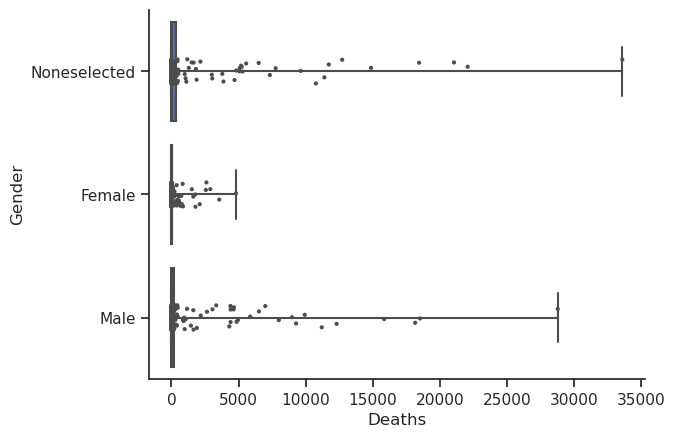

In [52]:
sns.set(style="ticks", color_codes=True)

# Plot the text length with horizontal boxes
ax = sns.boxplot(x="Deaths", y="Gender", data=df,
                 whis=np.inf)

# Add in points to show each tweet
sns.stripplot(x="Deaths", y="Gender", data=df,
              jitter=True, size=3, color=".3", linewidth=0)

# This removes top and right axis
sns.despine(trim=False)

In [ ]:
from ipywidgets import interact
from scipy.stats import skewnorm

# Start by fattening the function distribution here
def plot_norm(mean=0,sd=5, a=0):
    plt.hist(skewnorm.rvs(a=a, size=100000),bins=100)
    plt.xlim((-15,15))
    plt.title("Normal")

# Add a new parameter to control the fatness of the distribution side
interact(plot_norm, mean=(-5,0,5), sd=(1,5,30), a=(-4,0,4))

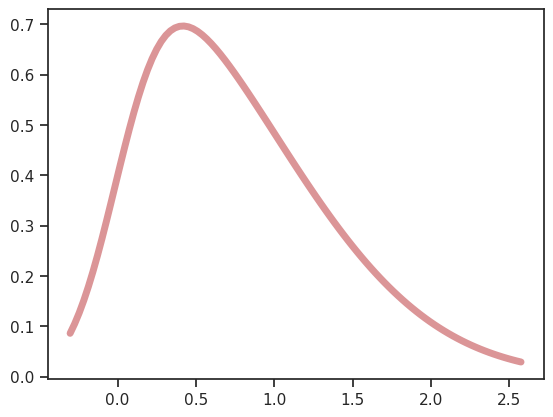

In [56]:
from scipy.stats import skewnorm

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
a = 4

mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.01, a),

                skewnorm.ppf(0.99, a), 100)

ax.plot(x, skewnorm.pdf(x, a),

       'r-', lw=5, alpha=0.6, label='skewnorm pdf')

In [59]:
skewnorm.rvs??

Signature: skewnorm.rvs(*args, **kwds)
Source:   
    def rvs(self, *args, **kwds):
        """Random variates of given type.

        Parameters
        ----------
        arg1, arg2, arg3,... : array_like
            The shape parameter(s) for the distribution (see docstring of the
            instance object for more information).
        loc : array_like, optional
            Location parameter (default=0).
        scale : array_like, optional
            Scale parameter (default=1).
        size : int or tuple of ints, optional
            Defining number of random variates (default is 1).
        random_state : {None, int, `numpy.random.Generator`,
                        `numpy.random.RandomState`}, optional

            If `seed` is None (or `np.random`), the `numpy.random.RandomState`
            singleton is used.
            If `seed` is an int, a new ``RandomState`` instance is used,
            seeded with `seed`.
            If `seed` is already a ``Generator`` or ``Rando